# Boundary value problem

### In general case:

$L[y]=y''+p(x)y'+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

Посмотрим, как выглядит система для уравнений второго порядка(second order):

Вторую производную приближаем так: $y''(x_k) = y_k'' = \frac{y_{k+1} - 2y_k + y_{k-1}}{h^2} + O(h^2)$

Первую так: $y_k' = \frac{y_{k+1} - y_{k-1}}{2h} + O(h^2)$

Уравнение перепишется в виде $\frac{y_{k+1} - 2 y_k + y_{k-1}}{h^2} + p_k\frac{y_{k+1} - y_{k-1}}{2h} + q_k y_k = f_k $, для $k \in [1, ..., N-1]$

А граничные условия: $(\alpha_0 || \beta_0) y_{0, n} + (\alpha_1 || \beta_1) \frac{-1.5 y_{0, n} + 2 y_{1, n-1} - 0.5 y_{2, n-2}}{\pm h} = (A || B)$, где производная записана через одностороннюю трехточечную схему

-

Во случае схемы первого порядка производную нужно аппроксимировать так: $y_k' = \frac{y_{k+1} - y_k}{h} + O(h)$

И тогда уравнение будет такое: $\frac{y_{k+1} - 2 y_k + y_{k-1}}{h^2} + p_k\frac{y_{k+1} - y_k}{h} + q_k y_k = f_k $, для $k \in [1, ..., N-1]$

А граничные условия: $(\alpha_0 || \beta_0) y_{0, n} + (\alpha_1 || \beta_1) \frac{y_{1, n-1} - y_{0, n}}{\pm h} = (A || B)$

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

def p(x):
    return -np.log(x)
def q(x):
    return -2
def f(x):
    return 1
a = 0.5
b = 1.5
alpha = [1, 1]
beta = [1, -1]
A = 1
B = 0

#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,P,Q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # P(x), Q(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    
    grid = np.linspace(a, b, N)
    h = grid[1] - grid[0]
    
    r = np.array([f(x) for x in grid]) # правая часть
    p = np.array([P(x) for x in grid]) # значение P(x) в узлах
    q = np.array([Q(x) for x in grid]) # значение Q(x) в узлах
    
    r[0] = A
    r[-1] = B  # граничные условия, правая часть
    
    M = np.zeros((N,N))
    
    
    
    for i in range(1, N-1):
        M[i, i-1] = 1 / h**2 - p[i] / (2*h)
        M[i, i] = -2 / h**2 + q[i]             # внутренние точки интервала
        M[i, i+1] = 1 / h**2 + p[i] / (2*h)
    
    M[0, 0] = alpha[0] - 1.5 * alpha[1] / h    # левая граница
    M[0, 1] = 2 * alpha[1] / h
    M[0, 2] = -0.5 * alpha[1] / h
    
    M[-1, -1] = beta[0] - 1.5 * beta[1] / (-h)    # правая граница
    M[-1, -2] = 2 * beta[1] / (-h)
    M[-1, -3] = -0.5 * beta[1] / (-h)
    
    y = solve(M, r)
    
    return y

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,P,Q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    
    grid = np.linspace(a, b, N)
    h = grid[1] - grid[0]
    
    r = np.array([f(x) for x in grid]) # правая часть
    p = np.array([P(x) for x in grid]) # значение P(x) в узлах
    q = np.array([Q(x) for x in grid]) # значение Q(x) в узлах
    
    r[0] = A
    r[-1] = B  # граничные условия, правая часть
    
    M = np.zeros((N,N))
    
    
    
    for i in range(1, N-1):
        M[i, i-1] = 1 / h**2
        M[i, i] = -2 / h**2 + q[i] - p[i] / h   # внутренние точки интервала
        M[i, i+1] = 1 / h**2 + p[i] / h
    
    M[0, 0] = alpha[0] - alpha[1] / h    # левая граница
    M[0, 1] = alpha[1] / h
    
    M[-1, -1] = beta[0] - beta[1] / (-h)    # правая граница
    M[-1, -2] = beta[1] / (-h)
    
    y = solve(M, r)
    
    return y

Кол-во точек для достижения точности 0.01 в second order scheme N = 397
Кол-во точек для достижения точности 0.03 в first order scheme N = 12673


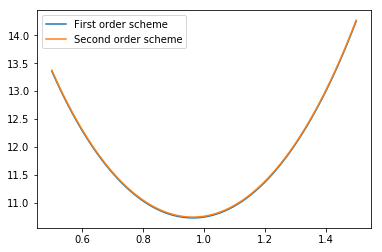

In [12]:
N = 100                                  # здесь сделаны оба метода для точности 1e-2(иначе у меня просто умирал ноут), а в следующей ячейке будет про h = 0.125 для second order
eps = 1e-2                               # FirstOrder работает достаточно долго, поэтому придется подождать

while(True):
    y = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)

    y_new = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,2*N - 1)  # шаг новой сетки в два раза меньше
    
    maxabs = 0
    
    for i in range(N):
        delt = np.abs(y[i] - y_new[2 * i])
        if delt > maxabs: maxabs = delt
    #print(N, maxabs)                         # если раскомментировать эту строчку, то можно будет увидеть, что ошибка спадает как h**2, то есть на каждой итерации падает в ~4 раза
    if maxabs < eps:
        N = 2*N - 1    # если максимальное отклонение в старых узлах уже не будет превышать нашей точности, можно прекращать, и брать в качестве решения самую последнюю сетку
        break
    N = 2*N - 1

Y_second = y_new.copy()
N_second = N
X_second = np.linspace(a, b, N_second)
print(f'Кол-во точек для достижения точности {eps} в second order scheme N = {N_second}')

N = 100
while(True):
    y = FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)

    y_new = FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,2*N - 1)  # шаг новой сетки в два раза меньше
    
    maxabs = 0
    
    for i in range(N):
        delt = np.abs(y[i] - y_new[2 * i])
        if delt > maxabs: maxabs = delt
    #print(N, maxabs)                   # если раскомментировать эту строчку, то можно будет увидеть, что ошибка спадает как h, то есть на каждой итерации падает в ~2 раза
    if maxabs < 3 * eps:
        N = 2*N - 1    # если максимальное отклонение в старых узлах уже не будет превышать нашей точности, можно прекращать, и брать в качестве решения самую последнюю сетку
        break
    N = 2*N - 1

Y_first = y_new
N_first = N
X_first = np.linspace(a, b, N_first)
print(f'Кол-во точек для достижения точности {3 * eps} в first order scheme N = {N_first}')    # он нереально долго считает

plt.plot(X_first, Y_first, label='First order scheme')
plt.plot(X_second, Y_second, label='Second order scheme')
plt.legend()
plt.show()

Конечно оба метода сошлись ~к одному и тому же, но для first order это обошлось гораздо большим кол-вом узлов(и то, я остановил его на более плохой точности, иначе их было бы в 4 раза больше, что не посчиталось бы у меня)

Если смотреть на то, как составляется матрица для системы, то можно заметить, что диагональный элемент по модулю больше, чем сумма модулей соседних по строчке элементов, то есть она диагонально доминирующая

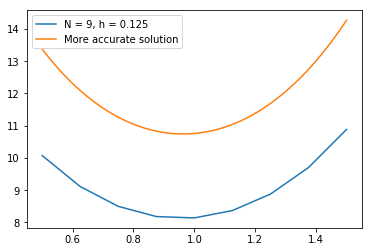

In [35]:
N_small = 9    # h = 0.125

X = np.linspace(a, b, N_small)
Y = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N_small)

plt.plot(X, Y, label='N = 9, h = 0.125')
plt.plot(X_second, Y_second, label='More accurate solution')   # сравним с более хорошим решением
plt.legend()
plt.show()

Возможно вид кривой не сильно изменился(т.е. если нам важен примерный вид решения, то сойдет), но сами значения далеки от истины

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

Кол-во точек для достижения точности 1e-06 в second order scheme N = 397


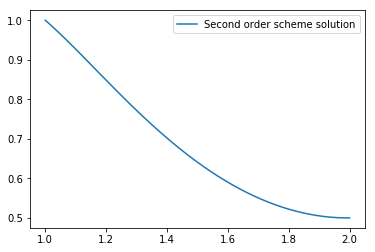

In [36]:
# Вначале решим с помощью метода второго порядка, зададим необходимые переменные и функции для уравнения:
def p(x):
    return 2
def q(x):
    return -3 * x
def f(x):
    return (2 - 8 * x) / x**3
a = 1
b = 2
alpha = [1, 0]
beta = [1, 0]
A = 1
B = 0.5

N = 100
eps = 1e-6

while(True):
    y = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)

    y_new = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,2*N - 1)  # шаг новой сетки в два раза меньше
    
    maxabs = 0
    
    for i in range(N):
        delt = np.abs(y[i] - y_new[2 * i])
        if delt > maxabs: maxabs = delt
    #print(N, maxabs)
    if maxabs < eps:
        N = 2*N - 1    # если максимальное отклонение в старых узлах уже не будет превышать нашей точности, можно прекращать, и брать в качестве решения самую последнюю сетку
        break
    N = 2*N - 1

X = np.linspace(a, b, N)
Y = y_new
print(f'Кол-во точек для достижения точности {eps} в second order scheme N = {N}')

plt.plot(X, Y, label='Second order scheme solution')
plt.legend()
plt.show()

In [ ]:
# теперь попробуем Галёркина